<a href="https://colab.research.google.com/github/jmccahill5/datman/blob/main/PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler


from google.colab import files


import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%matplotlib inline




In [2]:
#  ABSTRACT
#  These datasets include data from the US Census and Statista that measures the status of the housing market using measurements that I will describe in future notes
#  This data is useful because it allows us to look at trends with the data, and see whether two variables may correlate with each other

aok: ok but give urls to original data!!! i need to be able to go online and easily find the original data, who knows where on census these are

In [ ]:
#1st dataset

In [3]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/demand.csv

In [ ]:

!pwd

!ls

/content
ex1.csv  sample_data


In [5]:
dat=pd.read_csv('ex1.csv')

In [6]:
dat.columns

Index(['DATE', 'CSUSHPISA', 'MORTGAGE30US', 'UMCSENT', 'INTDSRUSM193N',
       'MSPUS', 'GDP'],
      dtype='object')

In [ ]:
#What each variable means aok: nice
#INTDSRUSM193N	Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate)
#UMCSENT	University of Michigan: Consumer Sentiment
#GDP	Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate)
#MORTGAGE15US	30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)
#MSPUS	Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)

In [ ]:
dat.head(10)

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,1/1/2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,1/4/2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,1/7/2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,1/10/2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,1/1/2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447
5,1/4/2004,148.209000,6.106154,93.333333,2.083333,217600,12112.815
6,1/7/2004,152.716667,5.894286,95.600000,2.500000,213500,12305.307
7,1/10/2004,157.535333,5.736154,93.866667,3.000000,228800,12527.214
8,1/1/2005,163.481333,5.768462,94.066667,3.500000,232500,12767.286
9,1/4/2005,169.347333,5.708462,90.200000,4.000000,233700,12922.656


In [ ]:
### dates are in (day)/(month)/(year) ** Start of Q1,Q2,Q3,Q4

In [7]:
dat["CSUSHPISA"].mean() #mean housing index for all measurements taken since 2003

180.658712495

In [ ]:
#2nd dataset

In [8]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/supply.csv

In [ ]:

!pwd

!ls

/content
ex1.csv  sample_data


In [10]:
dat2=pd.read_csv('ex1.csv')

In [11]:
dat2.columns

Index(['DATE', 'MSACSR', 'PERMIT', 'TLRESCONS', 'EVACANTUSQ176N'], dtype='object')

In [12]:
dat2.head(10)

,DATE,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,1/1/2003,4.2,1806.333333,421328.6667,14908
1,1/4/2003,3.833333333,1837.666667,429308.6667,15244
2,1/7/2003,3.633333333,1937.333333,458890,15614
3,1/10/2003,3.966666667,1972.333333,491437.3333,15654
4,1/1/2004,3.7,1994.666667,506856.3333,15895
5,1/4/2004,3.9,2080,526483.3333,16079
6,1/7/2004,4.3,2069.666667,552939,15656
7,1/10/2004,4.1,2086,561413.3333,15361
8,1/1/2005,4.266666667,2105,590790.3333,15748
9,1/4/2005,4.266666667,2137.666667,611957,16061


In [ ]:
## what each variable name stands for
#PERMIT	New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate)
#MSACSR	Monthly Supply of New Houses in the United States (Seasonally Adjusted)
#TLRESCONS	Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate)
#EVACANTUSQ176N	Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted

In [ ]:
#merging the data into one set

In [13]:
mergedOuter = pd.merge(dat, dat2, how='outer', on=['DATE'],indicator=True)
mergedOuter

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,_merge
0,1/1/2003,129.321000,5.840769,79.966667,2.250000,186000.0,11174.129,4.2,1806.333333,421328.6667,14908,both
1,1/4/2003,131.756000,5.506923,89.266667,2.166667,191800.0,11312.766,3.833333333,1837.666667,429308.6667,15244,both
2,1/7/2003,135.013000,6.033846,89.300000,2.000000,191900.0,11566.669,3.633333333,1937.333333,458890,15614,both
3,1/10/2003,138.835667,5.919286,91.966667,2.000000,198800.0,11772.234,3.966666667,1972.333333,491437.3333,15654,both
4,1/1/2004,143.298667,5.597500,98.000000,2.000000,212700.0,11923.447,3.7,1994.666667,506856.3333,15895,both
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1/4/2022,303.422667,5.266154,57.866667,NaN,449300.0,25248.476,8.7,1734.666667,947300.3333,15286,both
78,1/7/2022,301.726333,5.623077,56.100000,NaN,468000.0,25723.941,9.566666667,1610.666667,910346,15306,both
79,1/10/2022,297.896667,6.664615,58.800000,NaN,479500.0,26137.992,9.2,1455.333333,870620.6667,14554,both
80,1/1/2023,NaN,6.372308,64.633333,NaN,436800.0,26465.865,8.033333333,1424.333333,842559.6667,15053,both


In [14]:
dat["CSUSHPISA"][0:3] #slice

0    129.321
1    131.756
2    135.013
Name: CSUSHPISA, dtype: float64

In [15]:
dat["CSUSHPISA"][77:80]

77    303.422667
78    301.726333
79    297.896667
Name: CSUSHPISA, dtype: float64

In [ ]:
# this is the Case Shiller US national home price index for January 2003 compared to January 2022 - an increase by 168 points using their algorithm

In [16]:
dat.groupby('CSUSHPISA').agg(['min', 'max'])

DATE            MORTGAGE30US              UMCSENT             \
                  min        max          min       max        min        max   
CSUSHPISA                                                                       
129.321000   1/1/2003   1/1/2003     5.840769  5.840769  79.966667  79.966667   
131.756000   1/4/2003   1/4/2003     5.506923  5.506923  89.266667  89.266667   
135.013000   1/7/2003   1/7/2003     6.033846  6.033846  89.300000  89.300000   
137.014333   1/1/2012   1/1/2012     3.922308  3.922308  75.500000  75.500000   
137.259667  1/10/2011  1/10/2011     4.002308  4.002308  64.800000  64.800000   
...               ...        ...          ...       ...        ...        ...   
277.317000  1/10/2021  1/10/2021     3.079231  3.079231  69.900000  69.900000   
290.868000   1/1/2022   1/1/2022     3.822308  3.822308  63.133333  63.133333   
297.896667  1/10/2022  1/10/2022     6.664615  6.664615  58.800000  58.800000   
301.726333   1/7/2022   1/7/2022     5.623077  5.623077  56.100000  56.100000   
303.422667   1/4/2022   1/4/2022     5.266154  5.266154  57.866667  57.866667   

           INTDSRUSM193N             MSPUS                GDP             
                     min       max     min     max        min        max  
CSUSHPISA                                                                 
129.321000      2.250000  2.250000  186000  186000  11174.129  11174.129  
131.756000      2.166667  2.166667  191800  191800  11312.766  11312.766  
135.013000      2.000000  2.000000  191900  191900  11566.669  11566.669  
137.014333      0.750000  0.750000  238400  238400  16068.824  16068.824  
137.259667      0.750000  0.750000  221100  221100  15842.267  15842.267  
...                  ...       ...     ...     ...        ...        ...  
277.317000           NaN       NaN  423600  423600  24349.121  24349.121  
290.868000           NaN       NaN  433100  433100  24740.480  24740.480  
297.896667           NaN       NaN  479500  479500  26137.992  26137.992  
301.726333           NaN       NaN  468000  468000  25723.941  25723.941  
303.422667           NaN       NaN  449300  449300  25248.476  25248.476  

[80 rows x 12 columns]

In [ ]:
# this table sorts by Case Shiller Index rating, so you can see where the other variables stood at certain index ranks. It is interesting to see the lower ranks being in 2003
# and also in 2011-2012 after the housing bubble

In [ ]:
dat.groupby('MORTGAGE30US').agg(['min', 'max'])

DATE              CSUSHPISA                UMCSENT  \
                    min        max         min         max        min   
MORTGAGE30US                                                            
2.760714      1/10/2020  1/10/2020  233.090000  233.090000  79.800000   
2.872143       1/7/2021   1/7/2021  266.831000  266.831000  74.766667   
2.875833       1/1/2021   1/1/2021  242.267000  242.267000  80.233333   
2.952308       1/7/2020   1/7/2020  222.641333  222.641333  75.666667   
3.003846       1/4/2021   1/4/2021  253.814000  253.814000  85.566667   
...                 ...        ...         ...         ...        ...   
6.372308       1/1/2023   1/1/2023         NaN         NaN  64.633333   
6.551538       1/7/2007   1/7/2007  178.261333  178.261333  85.733333   
6.560000       1/7/2006   1/7/2006  182.819333  182.819333  84.033333   
6.602308       1/4/2006   1/4/2006  183.997333  183.997333  83.800000   
6.664615      1/10/2022  1/10/2022  297.896667  297.896667  58.800000   

                        INTDSRUSM193N         MSPUS                GDP  \
                    max           min   max     min     max        min   
MORTGAGE30US                                                             
2.760714      79.800000          0.25  0.25  358700  358700  21704.706   
2.872143      74.766667           NaN   NaN  411200  411200  23550.420   
2.875833      80.233333          0.25  0.25  369800  369800  22313.850   
2.952308      75.666667          0.25  0.25  337500  337500  21362.428   
3.003846      85.566667          0.25  0.25  382600  382600  23046.934   
...                 ...           ...   ...     ...     ...        ...   
6.372308      64.633333           NaN   NaN  436800  436800  26465.865   
6.551538      85.733333          5.75  5.75  241800  241800  14564.117   
6.560000      84.033333          6.25  6.25  235600  235600  13870.188   
6.602308      83.800000          6.00  6.00  246300  246300  13753.424   
6.664615      58.800000           NaN   NaN  479500  479500  26137.992   

                         
                    max  
MORTGAGE30US             
2.760714      21704.706  
2.872143      23550.420  
2.875833      22313.850  
2.952308      21362.428  
3.003846      23046.934  
...                 ...  
6.372308      26465.865  
6.551538      14564.117  
6.560000      13870.188  
6.602308      13753.424  
6.664615      26137.992  

[80 rows x 12 columns]

In [ ]:
# Similarly, this shows Mortgage interest rates as the sorted variable to show how home values faired during periods of high and low interest rates

In [17]:
dat[['INTDSRUSM193N','MSPUS']].corr().round(2) #correlation between FED interest rates and Mean US home price sales

,INTDSRUSM193N,MSPUS
INTDSRUSM193N,1.0,-0.2
MSPUS,-0.2,1.0


In [ ]:
dat.dtypes

DATE              object
CSUSHPISA        float64
MORTGAGE30US     float64
UMCSENT          float64
INTDSRUSM193N    float64
MSPUS              int64
GDP              float64
RateCat           object
dtype: object

In [19]:
#new vars
dat['RateCat'] = '''high rates'''
dat['RateCat'][0:7]

0    high rates
1    high rates
2    high rates
3    high rates
4    high rates
5    high rates
6    high rates
Name: RateCat, dtype: object

In [ ]:
#dat['lowrates'].replace('''yes''','''no''',inplace=True)

In [20]:
dat['RateCat'][0:3]

0    high rates
1    high rates
2    high rates
Name: RateCat, dtype: object

In [21]:
dat.loc[dat['MORTGAGE30US'] <5, 'RateCat']  = '''low rates'''

In [22]:
dat[['MORTGAGE30US','RateCat']][20:40]

,MORTGAGE30US,RateCat
20,5.872308,high rates
21,6.086923,high rates
22,6.322308,high rates
23,5.841429,high rates
24,5.060000,high rates
25,5.012308,high rates
26,5.162308,high rates
27,4.922143,low rates
28,4.995833,low rates
29,4.922308,low rates


<Axes: ylabel='RateCat'>

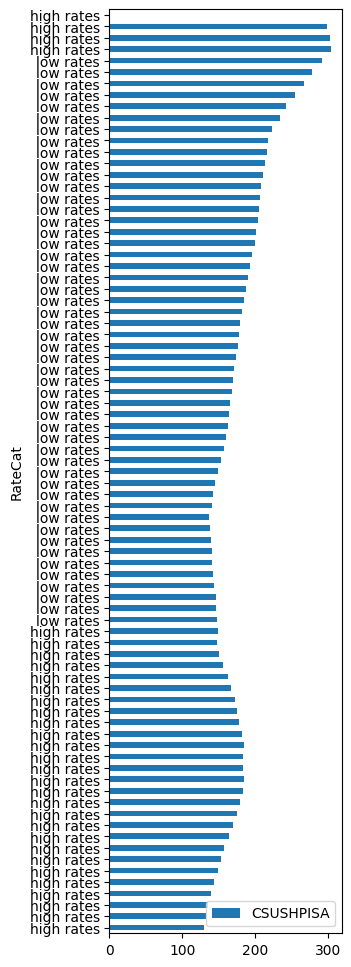

In [29]:
dat.plot.barh(x = 'RateCat',y = 'CSUSHPISA',figsize=(3,12)) #aok: better this way; still would be better if label was more meaningful than low or high rates; eg date; and when you have dates rather do line plots

In [ ]:
#this shows the means for each variable based on whether rates were more or less than 5% on average that quarter

In [ ]:
dat.groupby('RateCat').mean().round(0)

<ipython-input-130-df68cdc6d790>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dat.groupby('RateCat').mean().round(0)


,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
RateCat,,,,,,
high rates,176.0,6.0,79.0,3.0,256048.0,15030.0
low rates,183.0,4.0,84.0,1.0,296640.0,18705.0
